In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# a = np.random.random((16, 16))
# plt.imshow(a, cmap='hot', interpolation='nearest')
# plt.show()

In [33]:
pitches = pd.read_csv("../alldata.csv")
new_pitches = pitches.loc[pitches["away_team"] == "hou"]
x_values = new_pitches.px.values
z_values = new_pitches.pz.values

In [40]:
x_z_values = list(zip(x_values, z_values))

In [42]:
x_z_values

[(-0.163, 2.446),
 (0.778, 2.99),
 (1.024, 2.181),
 (0.996, 1.921),
 (-0.273, 1.361),
 (0.974, 2.877),
 (-0.754, 2.437),
 (0.5479999999999999, 3.38),
 (0.659, 3.187),
 (0.006999999999999999, 2.999),
 (0.152, 2.43),
 (-0.569, 3.645),
 (-1.065, 2.2030000000000003),
 (-1.673, 2.099),
 (0.203, 2.039),
 (0.051, 2.929),
 (-0.908, 3.345),
 (-0.675, 2.323),
 (0.2, 2.008),
 (0.938, 2.357),
 (-0.642, 3.896),
 (0.6629999999999999, 2.434),
 (0.7040000000000001, 3.994),
 (0.07400000000000001, -0.046),
 (-0.906, 2.333),
 (0.386, 2.904),
 (-0.109, 2.551),
 (-0.551, 1.633),
 (0.142, 2.269),
 (-0.843, 1.941),
 (1.342, 1.091),
 (-1.341, 1.675),
 (-0.591, 0.883),
 (-1.357, 2.513),
 (-1.004, 1.857),
 (-0.192, 3.148),
 (-1.43, 2.901),
 (0.388, 4.062),
 (-1.108, 2.915),
 (-1.198, 1.7519999999999998),
 (-0.7, 2.728),
 (-0.685, 2.737),
 (0.848, 2.764),
 (-0.77, 3.157),
 (-0.202, 1.582),
 (-2.461, 2.474),
 (0.482, 2.198),
 (-1.126, 0.615),
 (0.913, 2.003),
 (0.684, 1.463),
 (-0.403, 2.946),
 (-0.753, 2.465),
 

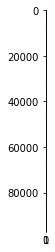

In [39]:
plt.imshow(x_z_values, cmap='hot', interpolation='nearest')
plt.show()

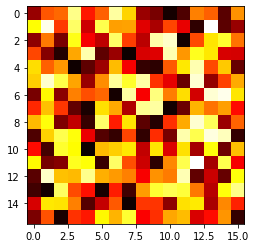

In [28]:
a = np.random.random((16, 16))
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

In [43]:
a

array([[0.21717258, 0.49857434, 0.52309467, 0.88102123, 0.40578273,
        0.5142601 , 0.90577861, 0.68383411, 0.22188294, 0.1725769 ,
        0.024625  , 0.11089409, 0.55910469, 0.51227221, 0.12524909,
        0.58461201],
       [0.7476155 , 0.97783193, 0.45591294, 0.84538432, 0.29720323,
        0.82431713, 0.6051283 , 0.60783086, 0.32543942, 0.24691804,
        0.47024977, 0.33807681, 0.0621555 , 0.99953773, 0.12852072,
        0.21957519],
       [0.20128302, 0.54812207, 0.17123844, 0.76878124, 0.35629984,
        0.27351063, 0.84720041, 0.46350173, 0.26936697, 0.91126634,
        0.94479672, 0.01928054, 0.47761387, 0.71191887, 0.79155054,
        0.54073194],
       [0.47411728, 0.18894746, 0.04844146, 0.6162305 , 0.91556102,
        0.13217157, 0.22203645, 0.0132845 , 0.31036245, 0.32179866,
        0.92048672, 0.59565357, 0.7756848 , 0.71579691, 0.31120834,
        0.30713981],
       [0.70037298, 0.51322665, 0.59239772, 0.01631902, 0.1314392 ,
        0.22576954, 0.64996725, 

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [54]:
pitches2 = pd.read_csv("../pitches.csv")
atbats = pd.read_csv("../atbats.csv")
games = pd.read_csv("../games.csv")
pitches2 = pitches2.loc[:, ['code', 'pitch_type', 'ab_id', 'b_count', 's_count', 'outs', 'on_1b', 'on_2b', 'on_3b']]

In [55]:
atbats = atbats.loc[:, ['g_id', 'ab_id']]
games = games.loc[:, ['away_team', 'g_id', 'home_team']]

In [56]:
pitches_atbats = pd.merge(pitches2, atbats)

In [59]:
all_data = pd.merge(pitches_atbats, games)
all_data

,code,pitch_type,ab_id,b_count,s_count,outs,on_1b,on_2b,on_3b,g_id,away_team,home_team
0,C,FF,2.015000e+09,0.0,0.0,0.0,0.0,0.0,0.0,201500001,sln,chn
1,S,FF,2.015000e+09,0.0,1.0,0.0,0.0,0.0,0.0,201500001,sln,chn
2,F,FF,2.015000e+09,0.0,2.0,0.0,0.0,0.0,0.0,201500001,sln,chn
3,B,FF,2.015000e+09,0.0,2.0,0.0,0.0,0.0,0.0,201500001,sln,chn
4,B,CU,2.015000e+09,1.0,2.0,0.0,0.0,0.0,0.0,201500001,sln,chn
...,...,...,...,...,...,...,...,...,...,...,...,...
2867149,D,SL,2.018186e+09,3.0,2.0,2.0,0.0,0.0,0.0,201802431,mil,chn
2867150,B,FF,2.018186e+09,0.0,0.0,2.0,1.0,0.0,0.0,201802431,mil,chn
2867151,F,FF,2.018186e+09,1.0,0.0,2.0,0.0,1.0,0.0,201802431,mil,chn
2867152,S,FF,2.018186e+09,1.0,1.0,2.0,0.0,1.0,0.0,201802431,mil,chn


In [60]:
import re

In [61]:
hou_201516_away = all_data.loc[all_data["away_team"] == "hou"].loc[all_data["g_id"] < 201700001]
hou_201516_home = all_data.loc[all_data["home_team"] == "hou"].loc[all_data["g_id"] < 201700001]

In [62]:
hou_2015

,code,pitch_type,ab_id,b_count,s_count,outs,on_1b,on_2b,on_3b,g_id,away_team,home_team
14143,D,CH,2.015004e+09,0.0,0.0,0.0,0.0,0.0,0.0,201500050,hou,tex
14144,S,CH,2.015004e+09,0.0,0.0,0.0,1.0,0.0,0.0,201500050,hou,tex
14145,X,CH,2.015004e+09,0.0,1.0,0.0,1.0,0.0,0.0,201500050,hou,tex
14146,C,CH,2.015004e+09,0.0,0.0,1.0,0.0,1.0,0.0,201500050,hou,tex
14147,B,KC,2.015004e+09,0.0,1.0,1.0,0.0,1.0,0.0,201500050,hou,tex
...,...,...,...,...,...,...,...,...,...,...,...,...
1415118,*B,CU,2.016184e+09,0.0,1.0,1.0,1.0,1.0,0.0,201602418,hou,ana
1415119,S,FC,2.016184e+09,1.0,1.0,1.0,1.0,1.0,0.0,201602418,hou,ana
1415120,F,FF,2.016184e+09,1.0,2.0,1.0,1.0,1.0,0.0,201602418,hou,ana
1415121,C,FF,2.016184e+09,1.0,2.0,1.0,1.0,1.0,0.0,201602418,hou,ana
